# Detección de anomalías

Una **anomalía** es un ejemplo u observación que **no sigue un patrón esperado** de acuerdo al resto de casos disponibles. Estadísticamente se los denomina **outliers**.

Nos vamos a concentrar en detectar una fila o ejemplo, más que en un valor puntual.

<img src="images/anomaly.PNG" width="80%" />

# Aplicaciones reales

- Detección de fraude en compras con tarjetas de crédito
- Detección de intrusos
- Mecanismos de control en procesos de manufactura
- Monitoreo de comportamiento en data centers
- Detección de *cheaters* en juegos para dispositivos móviles
- Detección de publicaciones de artículos prohíbidos o inválidos en *marketplaces*
- ...

# Outliers vs. novelty detection

Se denomina **outlier detection** cuando disponemos de casos anómalos dentro del conjunto de datos de entrenamiento. Por el contrario, cuando en los datos existentes no existe ningún valor anómalo pero interesa poder detectarlos en algún momento, entonces el problema se denomina **novelty detection**.

# Outlier detection

El objetivo es entrenar un modelo que sea capaz de discenir **inliner** de **outliers**.

Al final, ¿es un problema de clasificación muy desbalanceado?.

## Algunos métodos para detectar outliers

### Asumiendo normalidad ...

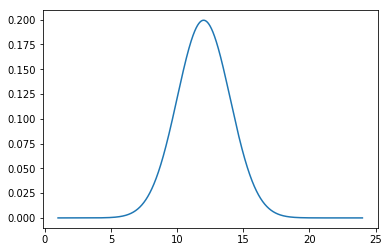

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Plot between 1 and 24 with .001 steps.
x_axis = np.arange(1, 24, 0.001)
# Mean = 12, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis, 12, 2))

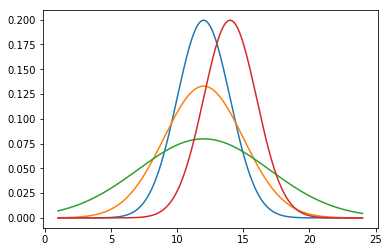

In [2]:
x_axis = np.arange(1, 24, 0.001)

plt.plot(x_axis, norm.pdf(x_axis, 12, 2))
plt.plot(x_axis, norm.pdf(x_axis, 12, 3))
plt.plot(x_axis, norm.pdf(x_axis, 12, 5))
plt.plot(x_axis, norm.pdf(x_axis, 14, 2))

\begin{equation*}
P(x; \mu, \sigma^2) >= \epsilon \to OK
\end{equation*}

\begin{equation*}
P(x; \mu, \sigma^2) < \epsilon \to outlier
\end{equation*}

In [124]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

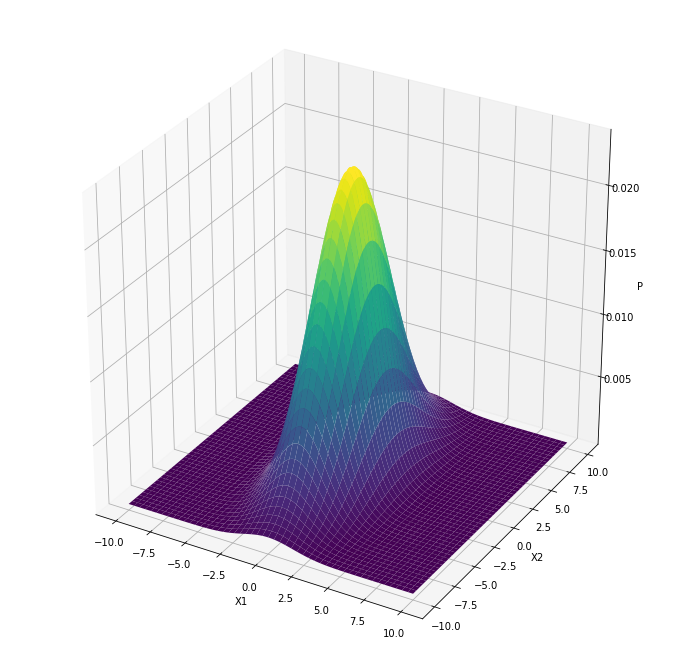

In [126]:
#Make a 3D plot
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('P')
plt.show()

\begin{equation*}
P(x_1; \mu, \sigma^2) P(x_2; \mu, \sigma^2) >= \epsilon \to OK
\end{equation*}

\begin{equation*}
P(x_1; \mu, \sigma^2)  P(x_2; \mu, \sigma^2) < \epsilon \to outlier
\end{equation*}

Es un enfoque simple y conveniente, pero estamos asumiendo que los datos vienen dados por una distribución en particular.

### Isolation Forest

Se utilizan árboles para intentar encontrar **outliers** dentro del conjunto de datos disponible.

Se crean árboles binarios seleccionando en cada nodo la variable y el valor para la condición de corte de forma aleatoria.

En cada nivel se fuerza a que exista un nodo hoja.

La probabilidad que un determinado caso sea un **outlier** viene dada por la profundidad promedio en la que ese caso fue aislado considerando todos los árboles creados.

<img src="images/isolation-forest.png"/>

<img src="images/if_inlier.png" width="75%" />

<img src="images/if_outlier.png" width="75%" />

### Local Outlier Factor

Se utiliza k-NN para estimar el "local outlier factor" de cada instancia y así poder obtener cuáles son **outliers**.

Por cada instancia *x* se comparan dos valores:
- Densidad local: distancia promedio entre *x* y sus k-vecinos. También llamada "Local Reachability Distance".
- Densidad local promedio de sus k vecinos: suma de las densidades locales de los k vecinos, divido por el valor de k.

A partir de estos valores se obtiene una ratio que indica el grado de similaridad que existe entre la densidad de muestras que tiene la instancia y la densidad que tiene cada vecino de ésta.

<img src="images/lof_ld.svg" />

<img src="images/lof_example.png" width="50%" />

La implementación matemática tiene algunos retoques en cómo se organizan los valores mencionados previamente. Es esperable que el valor resultante para cada caso sea cercano a 1 para **inliers** y mucho mayor para **outliers**.

### Bonus track: Descomposición del problema de detección de anomalías en un conjunto de problemas de aprendizaje supervisado (Paulheim y Meusel, 2015).

Se intenta estimar el valor de cada variable de entrada en base al resto de variables independientes.

De esta forma se crean n modelos, donde n es el número de variables de entrada disponibles.

A cada variable se le asigna un "peso" que determina de alguna forma cuánto ayuda esa variable a detectar valores anómalos.

Una vez creados todos los modelos, para detectar si una instancia es un **outlier** o no se estiman todos los valores de sus variables de entrada y se computan las diferencias en relación a los valores reales. El resultado de esto es una estimación que indica lo "raro" de ese ejemplo en relación a los patrones encontrados en el resto de los datos.

In [2]:
import pandas as pd

df = pd.DataFrame({'hour': [1013, 1556, 1704, 2109, 1640, 1542],
                   'amount': [500, 1025, 750, 10600, 140, 190],
                   'balance': [8000, 5010, 6511, 5151, 405, 82312],
                   'customer_amount_mean': [600, 860, 1030, 50, 150, 200]})

In [3]:
df

,hour,amount,balance,customer_amount_mean
0,1013,500,8000,600
1,1556,1025,5010,860
2,1704,750,6511,1030
3,2109,10600,5151,50
4,1640,140,405,150
5,1542,190,82312,200


<img src="images/ALSO.PNG" width="75%" />

## Novelty detection

Se pueden aplicar las tećnicas vistas anteriormente, pero no es factible medir la performance del modelo dado que no existen casos **anómalos** aún en nuestro conjunto de datos.